#### Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set styles for plots
sns.set(style = 'whitegrid')


#### Loading the Dataset

In [26]:
df = pd.read_csv('/Users/hpourmand/Desktop/All2/911.csv')

# The first few rows of the dataset
print(df.head())


         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & 

#### Basic Data Information

In [17]:
print(df.info())

# Basic statistics of numerical columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB
None
                 lat            lng            zip         e
count  663522.000000  663522.000000  583323.000000  663522.0
mean       40.158162     -75.300105   19236.055791       1.0
std         0.220641       1.672884     298.222637       0.0
min         0.000000    -119.698206    1104.000000       1.0
25%        40.100344     -75.392735   19038.000000       1.0
50%  

#### Find and Remove Duplicates

In [18]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f'Number of duplicate rows: {len(duplicate_rows)}')

# Remove duplicates
df = df.drop_duplicates()

print(f'Shape of the dataset after removing duplicates: {df.shape}')

Number of duplicate rows: 240
Shape of the dataset after removing duplicates: (663282, 9)


#### Find Missing Values

In [27]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Columns with missing values
missing_columns = missing_values[missing_values > 0].index
print(f'Columns with missing values: {missing_columns}')


Missing values in each column:
lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64
Columns with missing values: Index(['zip', 'twp'], dtype='object')


#### Impute Missing Values

In [20]:
# Impute missing values 
for column in missing_columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

# Verify if missing values are handled
print('Missing values after imputation:')
print(df.isnull().sum())

/var/folders/z8/rs29j2g93hb0w4pdz9_5pl400000gn/T/ipykernel_21257/2252916974.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/var/folders/z8/rs29j2g93hb0w4pdz9_5pl400000gn/T/ipykernel_21257/2252916974.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

Missing values after imputation:
lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64


#### Normalize the Data

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize numerical data
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# The first few rows to verify normalization
print(df.head())


        lat       lng                                               desc  \
0  0.784992  0.212557  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  0.784217  0.214083  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  0.781550  0.213662  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  0.781452  0.213703  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  0.784089  0.212451  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

        zip                    title            timeStamp                twp  \
0  0.241707   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  0.240671  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  0.240080      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  0.240080   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4  0.237916           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr    e  
0      REINDEER CT & DEAD

#### Handle Outliers

In [22]:
# Remove outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f'Shape of the dataset after handling outliers: {df.shape}')

Shape of the dataset after handling outliers: (641103, 9)


#### Save cleaned DataFrame to CSV


In [23]:
df.to_csv('/Users/hpourmand/Desktop/All/calls.csv', index = False)

#### Find Correlation

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


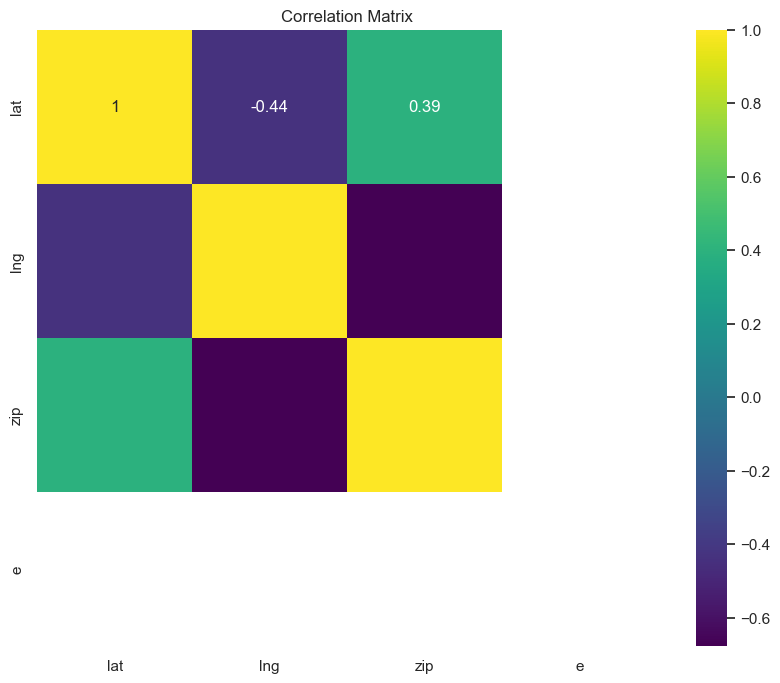

In [24]:
# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.grid(False)
plt.show()


#### Feature Engineering

In [25]:
# Convert the 'timeStamp' column to datetime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Extract date-related features
df['year'] = df['timeStamp'].dt.year
df['month'] = df['timeStamp'].dt.month
df['day'] = df['timeStamp'].dt.day
df['hour'] = df['timeStamp'].dt.hour
df['day_of_week'] = df['timeStamp'].dt.dayofweek
df['date'] = df['timeStamp'].dt.date

# Extract the reason for the call from the 'title' column
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

# The updated dataframe
print(df.head())


        lat       lng                                               desc  \
0  0.784992  0.212557  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  0.784217  0.214083  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  0.781550  0.213662  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  0.781452  0.213703  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  0.784089  0.212451  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

        zip                    title           timeStamp                twp  \
0  0.241707   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  0.240671  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  0.240080      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  0.240080   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4  0.237916           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr    e  year  month  day  hour  day_of_w

#### EDA: Distribution of Emergency Reasons

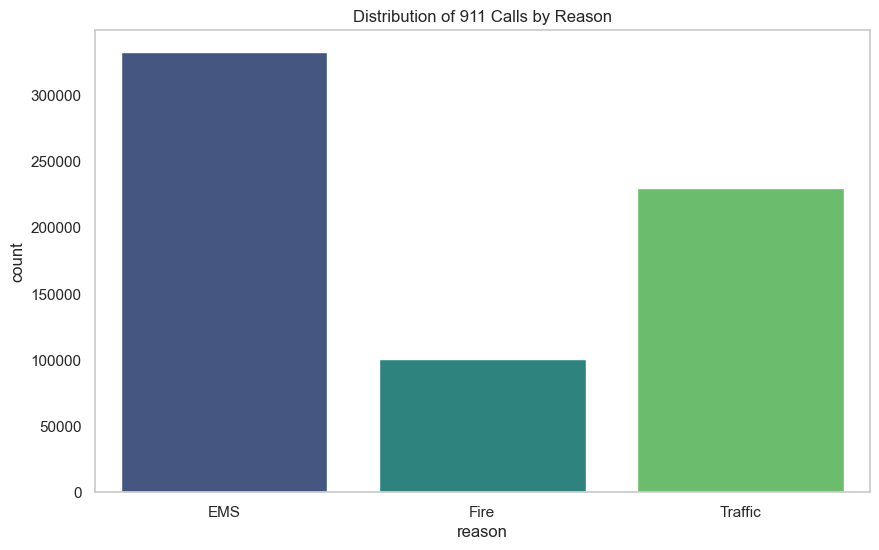

In [57]:
# Countplot of reasons for 911 calls
plt.figure(figsize=(10, 6))
sns.countplot(x='reason', data=df, palette='viridis')
plt.title('Distribution of 911 Calls by Reason')
plt.grid(False)
plt.show()


#### EDA: Calls Over Time

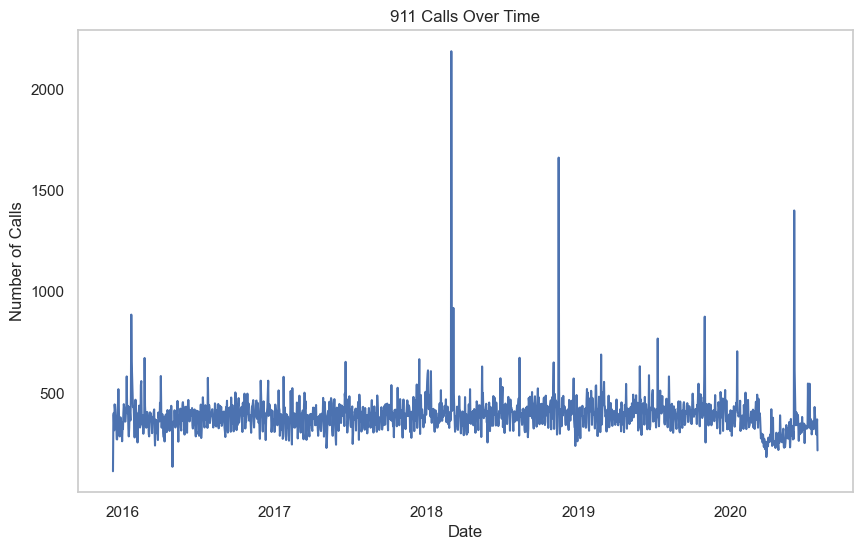

In [58]:
# Grouping by date
calls_by_date = df.groupby('date').count()

# Plotting the number of calls over time
plt.figure(figsize=(10, 6))
calls_by_date['lat'].plot()
plt.title('911 Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(False)
plt.show()


#### EDA: Calls by Day of the Week

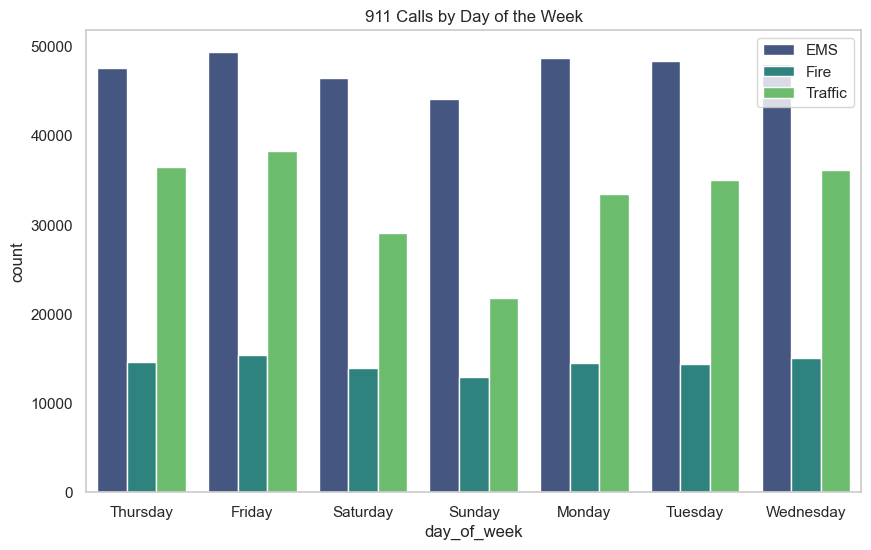

In [59]:
# Mapping days of the week to their names
df['day_of_week'] = df['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Countplot by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, hue='reason', palette='viridis')
plt.title('911 Calls by Day of the Week')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()


#### EDA: Calls by Hour of the Day


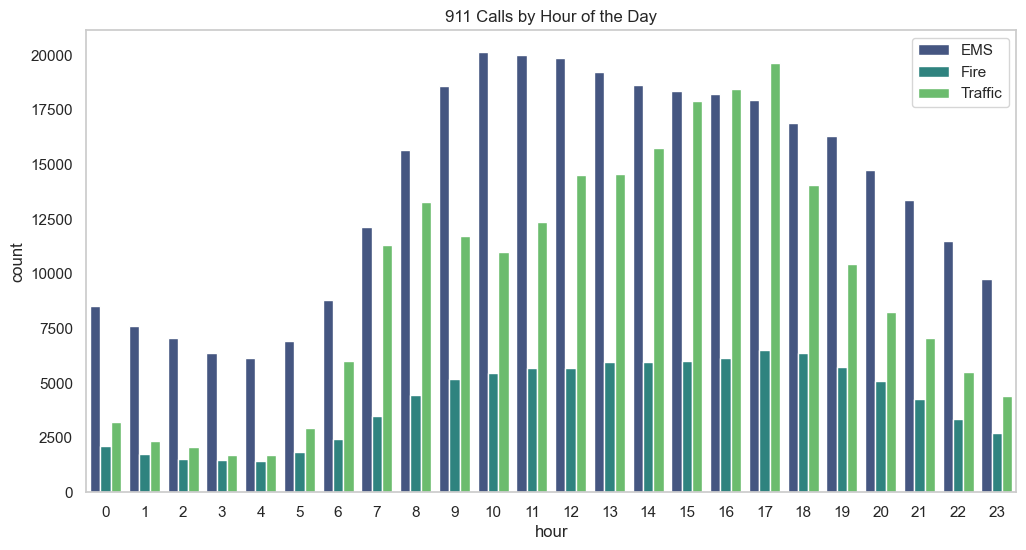

In [68]:
# Countplot by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df, hue='reason', palette='viridis')
plt.title('911 Calls by Hour of the Day')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()


#### EDA: Calls by Month

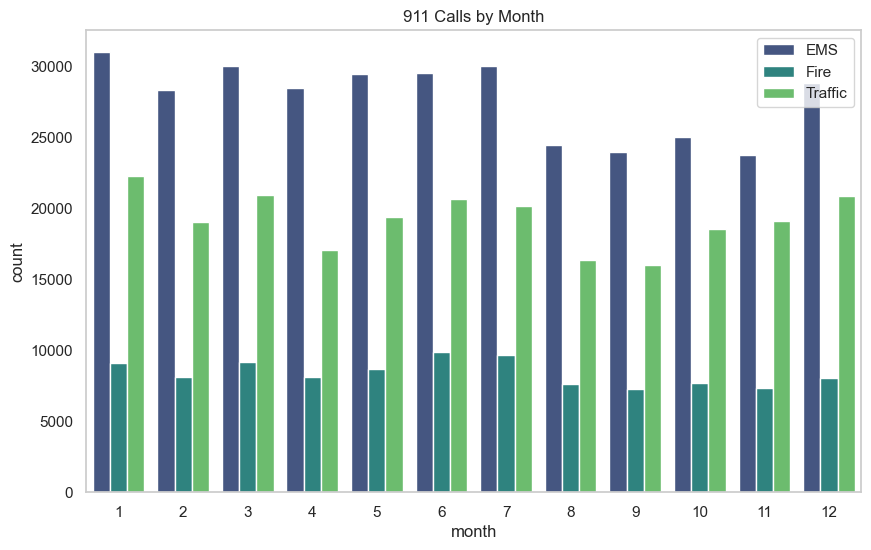

In [69]:
# Countplot by month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, hue='reason', palette='viridis')
plt.title('911 Calls by Month')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()


#### EDA: Heatmap of Calls by Day and Hour

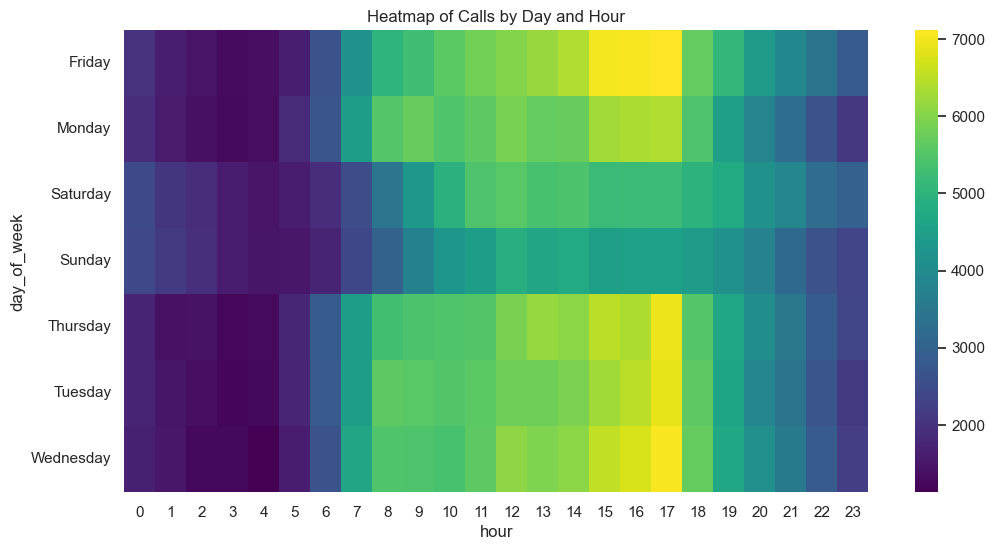

In [63]:
# Create a pivot table for the heatmap
day_hour = df.groupby(by=['day_of_week', 'hour']).count()['reason'].unstack()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(day_hour, cmap='viridis')
plt.title('Heatmap of Calls by Day and Hour')
plt.show()


#### EDA: Calls by Township

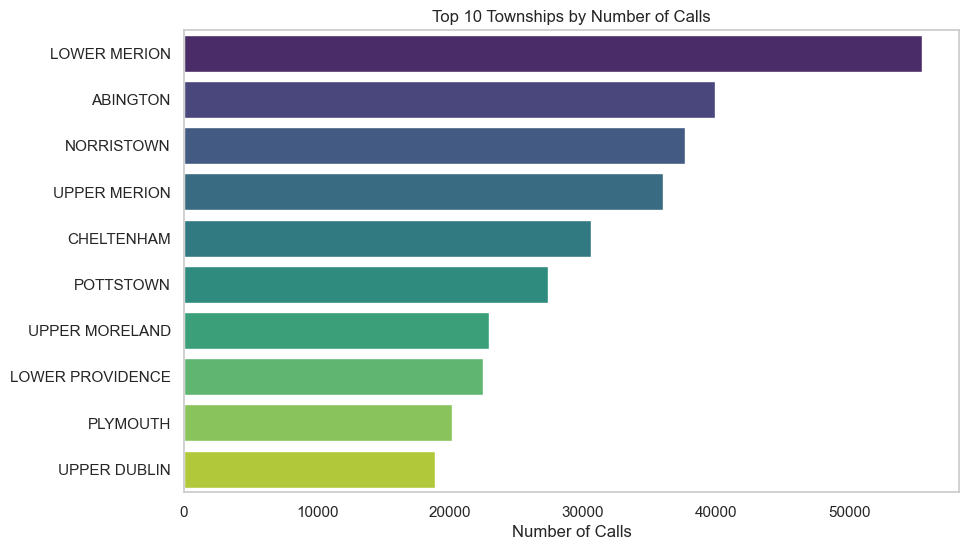

In [70]:
# Top 10 townships with the most calls
plt.figure(figsize=(10, 6))
top_townships = df['twp'].value_counts().head(10)
sns.barplot(x=top_townships.values, y=top_townships.index, palette='viridis')
plt.title('Top 10 Townships by Number of Calls')
plt.xlabel('Number of Calls')
plt.grid(False)
plt.show()


#### EDA: Geographic Distribution

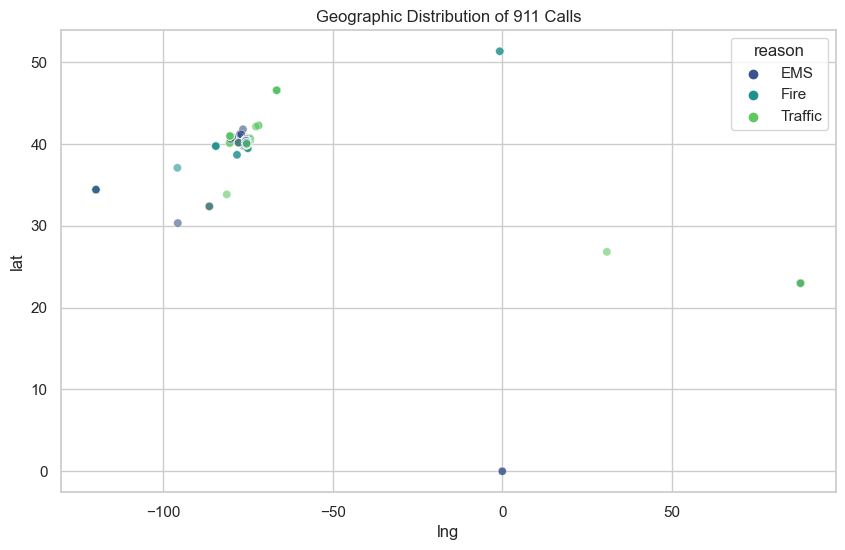

In [72]:
# Scatter plot of the geographic distribution of calls
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lng', y='lat', data=df, hue='reason', alpha=0.6, palette='viridis')
plt.title('Geographic Distribution of 911 Calls')
plt.show()
